## Activity 6 
## Preparation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import quantile_transform
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import OneHotEncoder  ##. better to use dummy from pandas 
from sklearn.preprocessing import PowerTransformer
from scipy.stats import boxcox
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
pd.options.display.max_rows = 50
## Install xlrd package to load Excel files
# conda install openpyxl
## conda install xlrd


In [2]:
clean_df = pd.read_csv('Customer_Analysis_Case_Study/Data/Data_Marketing_Customer_Analysis_Round3.csv')

##Hint: use the file Create Data_Marketing_Customer_Analysis_Round3.csv

### One Hot/Label Encoding of the categorical variables in the categoricals data frame that ### you created in Activity 4. ( Hint: check Dropfirst option).
### for the first iteration, we will focus on the numericals data (numericals data frame) as ##our data source.
### remove the outliers from the numerical columns.
### check if there are highly correlated features and drop them if there are any.
### X-y split (y is the target variable which is the total claim amount)

In [3]:
clean_df.columns



Index(['Unnamed: 0', 'region', 'customer_lifetime_value', 'response',
       'coverage', 'education', 'effective_to_date', 'month',
       'employment_status', 'gender', 'income', 'location_code',
       'marital_status', 'monthly_premium_auto', 'months_since_last_claim',
       'months_since_policy_inception', 'number_of_open_complaints',
       'number_of_policies', 'policy_type', 'policy', 'renew_offer_type',
       'sales_channel', 'total_claim_amount', 'vehicle_class', 'vehicle_size'],
      dtype='object')

In [5]:
numerical = clean_df.select_dtypes('int64') # asign numerics to new object


In [ ]:
categoricals = clean_df.select_dtypes('object')

## Hot coding of categorical  vars

In [50]:
categoricals.columns

Index(['region', 'response', 'coverage', 'education', 'effective_to_date',
       'month', 'employment_status', 'gender', 'location_code',
       'marital_status', 'policy_type', 'policy', 'renew_offer_type',
       'sales_channel', 'vehicle_class', 'vehicle_size'],
      dtype='object')

In [51]:
# Delete date column
categoricals =categoricals.drop('effective_to_date',1)

# Dont use in place here df.drop('a', axis=1, inplace=True) 

/var/folders/np/_4nsf5195pl0jfyhg25kr9q80000gn/T/ipykernel_29702/3229202658.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  categoricals =categoricals.drop('effective_to_date',1)


In [52]:
#Table of features
categoricals_features= categoricals.select_dtypes("object")
categoricals_features


,region,response,coverage,education,month,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,central,no,basic,college,feb,employed,m,suburban,married,corporate auto,corporate l3,offer3,agent,four-door car,medsize
1,west region,no,basic,college,jan,unemployed,f,suburban,single,personal auto,personal l3,offer4,call center,four-door car,medsize
2,east,no,basic,bachelor,feb,employed,m,suburban,single,personal auto,personal l3,offer3,call center,suv,medsize
3,north west,yes,extended,college,jan,employed,m,suburban,single,corporate auto,corporate l3,offer2,branch,four-door car,medsize
4,north west,no,premium,bachelor,jan,medical leave,f,suburban,married,personal auto,personal l2,offer1,branch,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,no,premium,bachelor,jan,unemployed,f,suburban,married,personal auto,personal l1,offer3,web,luxury car,medsize
10685,north west,no,basic,college,jan,employed,f,urban,married,personal auto,personal l3,offer2,branch,four-door car,medsize
10686,central,no,extended,bachelor,feb,employed,f,rural,married,corporate auto,corporate l3,offer1,web,luxury suv,medsize
10687,west region,no,premium,college,feb,employed,f,urban,divorced,personal auto,personal l1,offer1,branch,suv,medsize


In [53]:

cat_dic_cols =OneHotEncoder(drop='first').fit(categoricals_features).get_feature_names(input_features=categoricals_features.columns)

/opt/anaconda3/envs/DA/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [54]:
cat_dic_cols

array(['region_east', 'region_north west', 'region_west region',
       'response_yes', 'coverage_extended', 'coverage_premium',
       'education_college', 'education_doctor',
       'education_high school or below', 'education_master', 'month_jan',
       'employment_status_employed', 'employment_status_medical leave',
       'employment_status_retired', 'employment_status_unemployed',
       'gender_m', 'location_code_suburban', 'location_code_urban',
       'marital_status_married', 'marital_status_single',
       'policy_type_personal auto', 'policy_type_special auto',
       'policy_corporate l2', 'policy_corporate l3', 'policy_personal l1',
       'policy_personal l2', 'policy_personal l3', 'policy_special l1',
       'policy_special l2', 'policy_special l3',
       'renew_offer_type_offer2', 'renew_offer_type_offer3',
       'renew_offer_type_offer4', 'sales_channel_branch',
       'sales_channel_call center', 'sales_channel_web',
       'vehicle_class_luxury car', 'vehicle_cla

## Delete Outliers

In [6]:
# drop open claim 
# Delete date column
numerical =numerical.drop(['number_of_open_complaints', 'Unnamed: 0'],1)

/var/folders/np/_4nsf5195pl0jfyhg25kr9q80000gn/T/ipykernel_84701/1690503946.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  numerical =numerical.drop(['number_of_open_complaints', 'Unnamed: 0'],1)


In [7]:
Q1 = numerical.quantile(0.25)
Q3 = numerical.quantile(0.75)
IQR = Q3 - Q1


numerical_no_out = numerical[~((numerical < (Q1 - 1.5 * IQR)) |(numerical > (Q3 + 1.5 * IQR))).any(axis=1)]

In [8]:
## Check if numerical and numerical_no_out are different

numerical.info()
numerical_no_out.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10689 entries, 0 to 10688
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   customer_lifetime_value        10689 non-null  int64
 1   income                         10689 non-null  int64
 2   monthly_premium_auto           10689 non-null  int64
 3   months_since_last_claim        10689 non-null  int64
 4   months_since_policy_inception  10689 non-null  int64
 5   number_of_policies             10689 non-null  int64
 6   total_claim_amount             10689 non-null  int64
dtypes: int64(7)
memory usage: 584.7 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 8703 entries, 1 to 10687
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   customer_lifetime_value        8703 non-null   int64
 1   income                         8703 non-null

## Check for correlation

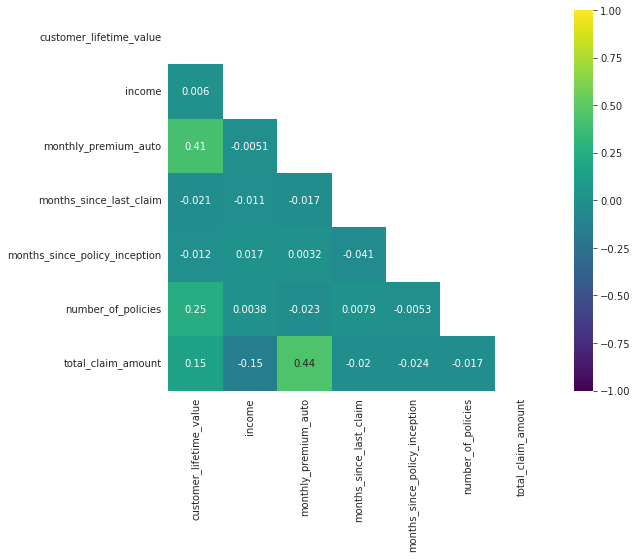

In [71]:
# Check for correlation

corr = numerical_no_out.corr() # parse df to correlation command
mask = np.zeros_like(corr) # mask all zeros 
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"): # hide mirroring part
    f, ax = plt.subplots(figsize=(9, 7)) # define plotsize
    ax = sns.heatmap(corr, mask=mask,cmap= 'viridis', vmin=-1,vmax=1,annot=True, square=True)

## Split x and y - I dont understand the question? I this supposed to be for supervised leaning?


In [10]:
### GLM 

numerical_no_out.columns
#numerical_no_out =numerical_no_out.drop(['Unnamed: 0', 'number_of_open_complaints'],1, inplace=True)



Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_policies', 'total_claim_amount'],
      dtype='object')

In [11]:
cs_df = numerical_no_out

##Activity 7

##Linear Regression

###Train-test split.
##Standardize the data (after the data split).
##Apply linear regression.
##Model Interpretation.


In [12]:
cs_df

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_policies,total_claim_amount
1,2228,26794,64,3,26,1,744
2,14947,22139,100,34,31,2,480
4,9025,23675,117,15,31,7,707
5,4745,50549,61,2,73,7,292
6,5035,37405,63,8,99,4,287
...,...,...,...,...,...,...,...
10680,4547,33531,116,11,15,1,801
10681,3579,28304,91,10,30,1,655
10682,2771,59855,74,30,82,1,355
10685,5259,61146,65,7,68,6,273


## check distribution of variables in x 

array([[<AxesSubplot:title={'center':'customer_lifetime_value'}>,
        <AxesSubplot:title={'center':'income'}>],
       [<AxesSubplot:title={'center':'monthly_premium_auto'}>,
        <AxesSubplot:title={'center':'months_since_last_claim'}>],
       [<AxesSubplot:title={'center':'months_since_policy_inception'}>,
        <AxesSubplot:title={'center':'number_of_policies'}>]],
      dtype=object)

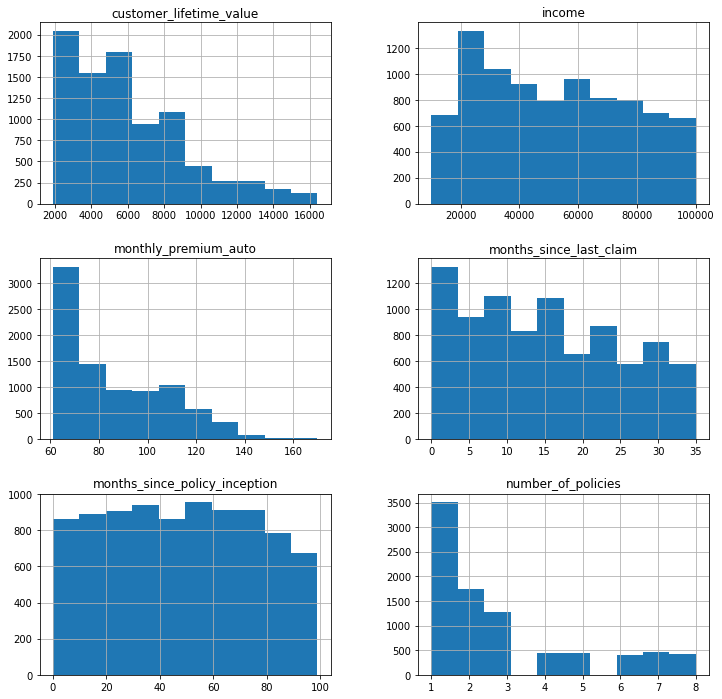

In [81]:
X.hist(figsize=(12,12))


# Train test split

In [14]:
# Split x and y 

y=cs_df['total_claim_amount']
X=cs_df.drop('total_claim_amount', axis=1)


In [15]:
# define train and test set 

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.30,random_state=123)

In [16]:
X_train

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_policies
7648,4803,72817,69,3,25,7
2918,4731,30686,61,22,45,3
4870,14244,31189,122,18,10,2
5620,12231,43244,103,15,16,2
6852,3286,60934,82,1,64,1
...,...,...,...,...,...,...
9090,5008,49769,73,4,0,8
9553,2860,50332,72,2,11,1
6403,4518,19186,62,10,34,5
1642,11085,69090,139,24,11,5


In [ ]:
## Standardize the data (Done after split based on distribution before split)

## How do perform different transformations on different variables 

In [20]:
std_scaler=StandardScaler().fit(X_train) 

X_train_scaled=std_scaler.transform(X_train)

In [21]:
X_test_scaled=std_scaler.transform(X_test)

## LN model 

In [22]:
X_train.shape

(6092, 6)

In [23]:
y_train.shape

(6092,)

In [26]:
## On Stockoverflow 
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [28]:
reg.coef_
reg.intercept_

array([-2.46408159e-03, -1.14417791e-03,  4.16056423e+00, -3.16171773e-01,
       -1.82092439e-01,  6.42631625e-01])

In [ ]:
# The coefficients
print("Coefficients: \n", reg.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(reg))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(reg))

In [30]:
## FROM RAFA 

# Check model fit
X_train_const_scaled = sm.add_constant(X_train_scaled) # adding a constant

model = sm.OLS(y_train, X_train_const_scaled).fit()
predictions_train = model.predict(X_train_const_scaled) 

X_test_const_scaled = sm.add_constant(X_test_scaled) # adding a constant
predictions_test = model.predict(X_test_const_scaled) 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:     total_claim_amount   R-squared:                       0.208
Model:                            OLS   Adj. R-squared:                  0.207
Method:                 Least Squares   F-statistic:                     266.2
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          2.16e-303
Time:                        14:45:45   Log-Likelihood:                -40328.
No. Observations:                6092   AIC:                         8.067e+04
Df Residuals:                    6085   BIC:                         8.072e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        380.2106      2.326    163.458      0.0

In [ ]:
## Interpretation
# R very low. Ony 20% ca be explained -> adjust or drop model
# WHere can I see my critical F? 

#

### Model fit

In [105]:
# The coefficients
print("Coefficients: \n", reg.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(reg))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(reg))


Coefficients: 
 [-2.46408159e-03 -1.14417791e-03  4.16056423e+00 -3.16171773e-01
 -1.82092439e-01  6.42631625e-01]


NameError: name 'mean_squared_error' is not defined

In [ ]:
## Predict 

In [32]:
y_pred=reg.predict(X_test_scaled)  

y_pred_train=reg.predict(X_train_scaled)

/opt/anaconda3/envs/DA/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/DA/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [33]:
X

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_policies
1,2228,26794,64,3,26,1
2,14947,22139,100,34,31,2
4,9025,23675,117,15,31,7
5,4745,50549,61,2,73,7
6,5035,37405,63,8,99,4
...,...,...,...,...,...,...
10680,4547,33531,116,11,15,1
10681,3579,28304,91,10,30,1
10682,2771,59855,74,30,82,1
10685,5259,61146,65,7,68,6


In [89]:
#Tasks 

##Model Evaluation:
##MSE.
##RMSE.
##MAE.
##R2.
##Adjusted R2.
##Feature Importance.

/opt/anaconda3/envs/DA/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


TypeError: unsupported format string passed to Series.__format__

## Model Performance 


In [35]:
y_test
y_pred

array([105.4567995 , 106.54859682, 113.88738186, ..., 109.93183271,
       116.52721406, 107.24242912])

In [36]:
result=pd.DataFrame({"y_test":y_test,"y_pred":y_pred})

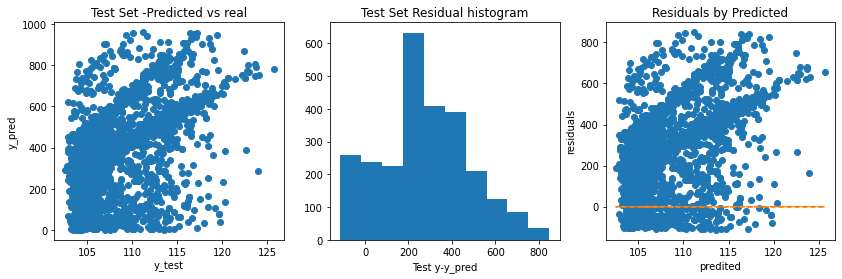

In [37]:
# Make an scatter plot y_pred vs y
# What kind of plot you will get if all the all the predictions are ok?
# A stright line

fig, ax = plt.subplots(1,3,figsize=(14,4))
ax[0].plot(y_pred, y_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set -Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
# It resembles a normal distribution?
ax[1].hist(y_test - y_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(y_pred,y_test - y_pred,"o")
ax[2].set_xlabel("predited")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y_pred,np.zeros(len(y_pred)),linestyle='dashed')

<AxesSubplot:xlabel='y_pred', ylabel='y_test'>

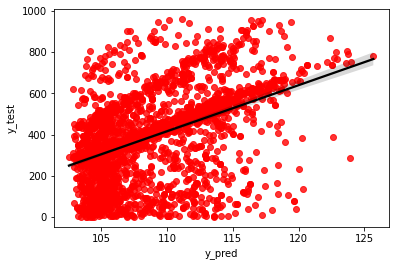

In [38]:
sns.regplot(x='y_pred',y='y_test', data=result, scatter_kws={"color": "red"}, line_kws={"color": "black"})

##Error metrics

In [39]:
print(mse(y_test,y_pred))
print(mae(y_test,y_pred))

119704.76761614846
290.39608651395775


In [40]:
##prediction on the train set
mse(y_train,y_pred_train)

114604.91734876252

In [41]:
R2=r2_score(y_test,y_pred)
R2

-1.7489596296336711

In [44]:
R2_test=reg.score(X_test_scaled,y_test)
R2_train=reg.score(X_train_scaled,y_train)

/opt/anaconda3/envs/DA/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/DA/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
